# Questão 1.

## Funções

In [1]:
# import Pkg; 
# Pkg.add("Polynomials")

using Polynomials
using Plots
using LinearAlgebra

In [2]:
""" O intuito da função resolve_diagonal é resolver equações Dx = b onde A é uma matriz diagonal NxN, 
X é uma matriz Nx1 e b também é uma matriz Nx1. Logo, a função recebe como entrada a Matriz Diagonal 
Quadrada NXN e o vetor B Nx1, e retorna o vetor x Nx1. """

function resolve_diagonal(D,b)     # D é diagonal e b é um vetor  
    tamanho = length(b)            # Pega-se o tamanho tanto do vetor quanto da matriz (pressupõe que são de mesmo tamanho)
    x=zeros(tamanho,1)             # Aloca o vetor x a ser retornado
    for i in 1:tamanho 
        x[i] = b[i]/D[i,i]         # Resolve cada x[i] de acordo com o valor da diagonal e o valor de b de cada linha
    end
    
    return x
end

resolve_diagonal (generic function with 1 method)

In [3]:
""" O intuito dessa função é resolver equações T.x = b tal que T seja uma matriz NxN e triangular superior,
x e b serão uma matriz coluna Nx1. A função deve retornar a solução x para tal sistema de equações."""

function resolve_triangular_superior(T,b)     #T é triangular superior
    tamanho = length(b)
    x=zeros(tamanho,1)
    
    i = tamanho
    while (i > 0)
        x[i] = b[i]/T[i,i]
        k = tamanho
        for j in i:(tamanho - 1)
            x[i] -= T[i, k] * x[k]/T[i,i]
            k -= 1
        end
        i -= 1
    end
    return x
end

resolve_triangular_superior (generic function with 1 method)

In [4]:
""" O intuito dessa função é resolver equações T.x = b tal que T seja uma matriz NxN e triangular inferior,
x e b serão uma matriz coluna Nx1. A função deve retornar a solução x para tal sistema de equações."""

function resolve_triangular_inferior(T,b)     #T é triangular inferior
    tamanho = length(b)
    x=zeros(tamanho,1)
    
    i = 1
    while (i <= tamanho)
        x[i] = b[i]/T[i,i]
        for j in 1:(i-1)
            x[i] -= T[i, j] * x[j]/T[i,i]
        end
        i += 1
    end
    return x
end

resolve_triangular_inferior (generic function with 1 method)

In [5]:
""" O intuito dessa função é realizar o processo de eliminação gaussiana com o sistema A.x = b, 
onde são passados a matriz densa quadrada A de NxN e a matriz coluna b de Nx1.
O retorno será o sistema escalonado, com A sendo uma matriz triangular superior."""

function eliminacao_gaussiana(A,b)      #A é uma matriz cheia ("matriz densa")
    tamanho = length(b)
    for i in 1:tamanho-1
        for j in i+1:tamanho
            multiplicador = A[j,i]/A[i,i]
            A[j, :] = A[j, :] - multiplicador*A[i, :]
            b[j] = b[j] - multiplicador*b[i]
        end
    end
    return A, b
end

eliminacao_gaussiana (generic function with 1 method)

In [6]:
function resolve_cheia(A,b)
    T,c= eliminação_gaussiana(A,b)  #O(n^3)
    x=resolve_triangular_superior(T,b)  #O(n^2)
    return x
end

resolve_cheia (generic function with 1 method)

In [7]:
function decomposicao_LU(A) #A é uma matriz cheia ("matriz densa")
    tamanho = size(A)
    tamanho = tamanho[1]
    L=zeros(tamanho,tamanho)
    
    for i in 1:tamanho
        L[i,i] = 1
    end
    
    U = zeros(tamanho, tamanho)
    
    for i in 1:tamanho
        for j in 1:tamanho
            U[i, j] = A[i, j]
        end
    end
    
    for i in 1:tamanho-1
        for j in i+1:tamanho
            L[j,i] = U[j,i]/U[i,i]
            U[j, :] = U[j, :] -L[j,i]*U[i, :]
        end
    end

    return L,U 
end

decomposicao_LU (generic function with 1 method)

In [8]:
function resolver_pos_LU(L,U,b)    #O(n^2) 
    y=resolve_triangular_inferior(L,b)
    x=resolve_triangular_superior(U,y)
    return x
end

resolver_pos_LU (generic function with 1 method)

## Testes das Funções

# Questão 2.

### Método de Taylor

In [9]:
""" Essa função faz a aproximação de uma função no ponto 'desejado' utilizando o polinômio de taylor
centrado no ponto 'referencia'. Para isso, deve-se passar a função, as múltiplas derivadas (quantas 
quiser - quanto mais melhor) e os pontos de referencia e desejado."""

function taylor(funcao, derivadas, referencia, desejado)  #TODO
    grau = length(derivadas)
    soma = funcao(referencia)
    fat = 1
    for i in 1:grau
        fat = fat * i
        soma = soma + (derivadas[i](referencia)*(desejado-referencia)^i)/fat
    end
    return soma
end

taylor (generic function with 1 method)

In [10]:
f(x) = log(x)
fd1(x) = 1/x; fd2(x) = -1/x^2; fd3(x) = 2/x^3; fd4(x) = -6/x^4; fd5(x) = 24/x^5; fd6(x) = -120/x^6; fd7(x) = 720/x^7;
der = [fd1,fd2,fd3,fd4,fd5,fd6,fd7]

println(taylor(f, der, 1, 1.5))
println(log(1.5))

0.40580357142857143
0.4054651081081644


In [11]:
f(x) = sin(x)
fd1(x) = cos(x); fd2(x) = -sin(x); fd3(x) = -cos(x); fd4(x) = sin(x); fd5(x) = cos(x); fd6(x) = -sin(x); fd7(x) = -cos(x);
der = [fd1,fd2,fd3,fd4,fd5,fd6,fd7]

println(taylor(f, der, 1, 1.3))
println(sin(1.2))

0.9635581840200099
0.9320390859672263


In [12]:
f(x) = x^5+4x^4-3x^2+1
fd1(x) = 5x^4+16x^3-6x; fd2(x) = 20x^3+48x^2-6; fd3(x) = 60x^2+96x; fd4(x) = 120x+96; fd5(x) = 120;
der = [fd1,fd2,fd3,fd4,fd5]

println(taylor(f, der, 1, 1.3))
println(f(1.3))

11.067330000000004
11.067330000000002


### Achar o Zero da Função por Bisseção

In [13]:
""" Na bisseção, queremos reduzir o intervalo ao máximo sempre garantindo que a função nos
extremos tenha sinais distintos, visto que isso garante, pelo Teorema do Valor Intermediário,
a existência de um zero de função nesse intervalo. Sendo assim, passamos a função, os extremos
esquerdo e direito do intervalo e o erro máximo esperado.
Retornamos a estimativa com um erro menor que o esperado."""

function bissecao(f, esq, dir, erro = 1e-2)
    m=0
    
    @assert(f(esq)*f(dir)<=0, "O intervalo passado não possui extremos com sinais distintos. Não podemos garantir um zero da função!")
    
    while abs(dir-esq) > erro
        m = (esq+dir)/2
        res = f(m)
        
        if res == 0.0
            break
        elseif res*f(esq) > 0     # verifica se f(m) e f(esq) possuem o mesmo sinal
            esq = m
        else                      
            dir = m
        end
    end
    
    return m
end

bissecao (generic function with 2 methods)

In [14]:
# Testando intervalo sem zero
f(x) = x^5+4x^4-3x^2+1
bissecao(f,-3,3)

LoadError: AssertionError: O intervalo passado não possui extremos com sinais distintos. Não podemos garantir um zero da função!

In [15]:
f(x) = x^5+4x^4-3x^2+1
bissecao(f,-10,10)

-3.798828125

In [16]:
f(x) = sin(x/2)
bissecao(f, 1, 10)

6.2822265625

### Achar o Zero da Função por Ponto Fixo

In [17]:
"""
Usamos o método do ponto fixo para encontrar o zero de função, a ideia é usar substituições
sucessivas de forma a encontrar uma interseção entre a função g(x) que definimos e a reta
y = x. O truque para achar o zero está em definir g(x) de forma que
a função tenha um ponto Z t.q. f(Z) = Z - g(Z) = 0.

@param: - função f recebe a função escolhida pelo usuário para achar o zero (no caso, a nossa função g)
        - a margem de erro eps
        - e o ponto inicial x0

@return: - zero da função f(x) (ponto fixo de g(x))
         - Retorna um erro de execução caso o método falhe em encontrar (diverge)
"""
function ponto_fixo(f, eps, x0)
    # Inicializa com infinito para saber se encontramos
    ponto_fixo = -Inf
    
    # quantidade de iterações dadas até encontrar
    steps = 1
    
    # Por conveniência vamos assumir que o método diverge 
    # se levar pelo menos 10^3 passos
    while steps < 10^3 
        nx = f(x0)

        if abs(nx - x0) < eps
            # achamos uma aproximação que respeita a margem de erro 
            ponto_fixo = nx
            break
        end

        steps += 1
        x0 = nx
    end
    
    # método falhou
    @assert(ponto_fixo != -Inf, "Método divergiu com o input dado")
    
    # retorna o ponto_fixo da função
    return ponto_fixo
end


ponto_fixo

In [18]:
function f(x)
    return x*cos(x) - x*x + 8*x - 1
end

function g(x)
    # g(x) é uma função cujo ponto fixo é um zero de f(x)
    return (x*cos(x) - x*x -1)/8.0
end

println(ponto_fixo(g, 0.001, 0.0))

-0.14558862306442932


In [19]:
function f(x)
    return x^3 - 7*x + 2
end

function g(x)
    # g(x) é uma função cujo ponto fixo é um zero de f(x)
    return (x^3 + 2)/7.0
end

println(ponto_fixo(g, 1e-3, 0.0))

0.2891641649379035


In [20]:
function f(x)
    return x^3 - x - 1
end

# se pegarmos uma g simples nesse caso o método tem que divergir
function g(x)
    # g(x) é uma função cujo ponto fixo é um zero de f(x)
    return (x^3 - 1)
end

println(ponto_fixo(g, 1e-6, 0.0))

LoadError: AssertionError: Método divergiu com o input dado

In [21]:
function f(x)
    return x^3 - x - 1
end

# se pegarmos uma g esperta o método tem que convergir
function g(x)
    # g(x) é uma função cujo ponto fixo é um zero de f(x)
    return cbrt(x + 1)
end

println(ponto_fixo(g, 1e-7, 0.0))

1.3247179361449652


### Achar o Zero da Função por Newton

In [22]:
""" Para o método de Newton, queremos nos aproveitar do ângulo tangente da curva para nos
aproximarmos precisamente do zero da função. Isso é feito encontrando a reta tangente a
curva no ponto atual e indo para o ponto dessa reta que cruza o eixo x. Para isso, precisamos
da função e sua derivada, o ponto inicial do método e o erro máximo esperado."""

function newton(f, fd, ponto, erro = 1e-8)
    # Primeiro descobrimos quantos termos precisamos
    termos = 1
    while (termos+1)*(2^(termos+1)) < 1/erro
        termos = termos+1
    end

    # Agora calculamos o taylor
    for i in 1:termos
        ponto = ponto - f(ponto)/fd(ponto)
    end
    
    return ponto
end

newton (generic function with 2 methods)

In [23]:
f(x) = x^5+4x^4-3x^2+1
fd(x) = 5x^4+16x^3-6x
newton(f,fd,-4)

-3.796694419165163

In [24]:
f(x) = sin(x/2)
fd(x) = 1/2 * cos(x/2)
newton(f, fd, 6)

6.283185307179586

In [25]:
f(x) = log(x)
fd(x) = 1/x
newton(f, fd, 2)

1.0

### Método de Euler

In [2]:
""" A função consiste em aproximar o valor em y de uma função em um ponto x_ini utilizando
apenas a derivada dessa função. Consiste em andar pequenos passos h estimando a curva pela
tangente (derivada) da curva no dado ponto.
Será necessário passar a derivada da curva, o x e y iniciais, o x final (ao qual desejamos
o y relativo a ele) e o h, que é o intervalo andado em x a cada etapa.
A função retorna o valor estimado de y no ponto x_final. """

function metodo_euler(derivada, x_ini, y_ini, x_final, h)
    # passos iniciais
    xi = x_ini
    yi = y_ini

    while xi + h <= x_final
        # pegamos o próximo valor de y andando pela reta tangente ao 
        # ponto x_i com um passo de tamanho H
        yi += derivada(xi, yi) * h
        xi += h
    end
    
    return yi # retornamos o valor de y no estado final
end

metodo_euler (generic function with 1 method)

### Resolver EDO com Problema de Valor Inicial

In [3]:
"""
Usamos o método de euler para resolver o problema de valor inicial. O método é usado para
aproximar o valor de EDOs, ele faz isso usando aproximações de retas tangentes para descrever
a curva repetidas vezes.

@param: - derivada de f(x, y(x))
        - x inicial
        - y inicial (isso é o valor inicial conhecido no nosso problema)
        - x_final denota o ponto x em que queremos uma aproximação para f
        - n denota em quantos subintervalos vamos dividir nosso intervalo

@return: - aproximação para f no ponto x_final
"""
function resolver_PVI(derivada, x_inicial, y_inicial, x_final, n)
    # tamanho do intervalo que usaremos dada a discretização desejada
    h = (x_final - x_inicial) / n
    
    yi = metodo_euler(derivada, x_inicial, y_inicial, x_final, h)
    
    return yi # retornamos o valor de y no estado final
end

resolver_PVI

In [4]:
df(x, y) = y

# queremos aproximar y(4) usando método de euler
# sendo y'(x) = y(x), y(0) = 1 e dividindo o intervalo em 40 partes

resolver_PVI(df, 0.0, 1.0, 4, 40)

LoadError: [91mUndefVarError: x_inicial not defined[39m

In [28]:
df(x, y) = y + 3*x

# queremos aproximar y(3) usando método de euler
# sendo y'(x) = y + 3x, y(3) = 1 e dividindo o intervalo em 3 partes

resolver_PVI(df, 0.0, 1.0, 3, 3)

20.0

In [29]:
df(x, y) = exp(-x)

# queremos aproximar y(5) usando método de euler
# sendo y'(x) = x^2 + 3x, y(2) = 10 e dividindo o intervalo em 40 partes

resolver_PVI(df, 0.0, 0.0, 2, 4)

1.0987701305162527

### Resolver um Sistema Ax=b

In [30]:
""" Essa função é um encapsulamento da resolução de sistema do formato 'A.x = b' 
utilizando decomposição LU. Para isso, é passado como parâmetro a matriz A e o 
vetor b, e o resultado será o vetor x."""

function resolver_um_sistema(A,b) 
    L, U = decomposicao_LU(A)
    x = resolver_pos_LU(L,U,b)
    return x
end

resolver_um_sistema (generic function with 1 method)

In [31]:
A=[1.0 3.0 2.0 7.0 ; 10.0 3.0 10.0 7.0 ; 3.0 5.0 18.0 22.0 ; 5.0 2.0 1.0 6.0]
b=[9.0 ; 23.0 ; 45.0 ; 20.0]

println(resolver_um_sistema(A,b))
println(A\b)

[2.1040532365396274; -5.474289171203875; -0.6170598911070786; 3.5075620084694505]
[2.104053236539625, -5.474289171203873, -0.6170598911070775, 3.507562008469449]


In [32]:
A=[1.0 3.0 2.0 ; -2.0 -1.0 5.0 ; 1.0 1.0 1.0]
b=[9.0 ; 3.0 ; -3.0]

println(resolver_um_sistema(A,b))
println(A\b)

[-8.307692307692305; 6.692307692307692; -1.3846153846153844]
[-8.307692307692307, 6.692307692307692, -1.3846153846153846]


In [33]:
A=[1.0 3.0 ; -1.0 2.0]
b=[3.0 ; -2.0]

println(resolver_um_sistema(A,b))
println(A\b)

[2.4; 0.2]
[2.4, 0.2]


### Resolver EDO com Problema de Valor de Contorno

In [34]:
""" Essa função utiliza da aproximação do valor de y por meio da sua segunda derivada. Para isso, além da segunda derviada
    recebemos dois pontos, e uma quantidade n de pontos utilizados entre eles para aproximar a curva. """

function resolver_PVC(segunda_derivada, x_inicial, y_inicial, x_final, y_final, n)  #Não dá pra fazer genericamente
    # Calcula o h
    h = (x_final - x_inicial)/n

    # Inicializa a matriz vazia
    A = []
    
    # Vetor auxiliar para construir a matriz 
    v = [-2, 1]
    
    # Preenche a primeira linha com 0's
    for i = 3:n-1
        push!(v, 0)
    end
    
    # Coloca o vetor auxiliar na matriz
    push!(A, v)
    
    # Constrói a matriz por meio dos vetores auxiliares
    for i = 2:n-2
        v = []
        for j = 1:i-2
            push!(v, 0)
        end
        push!(v, 1)
        push!(v, -2)
        push!(v, 1)
        for j = i+2:n-1
            push!(v, 0)
        end
        v = vcat(v...)
        push!(A, v)
    end
    
    # Termina de construir a matriz
    v = []
    for i = 1:n-3
        push!(v, 0)
    end
    push!(v, 1)
    push!(v, -2)
    push!(A, v)
    
    # Gera o vetor b de acordo com as aproximações da segunda derivada
    b = Any[segunda_derivada(x_inicial)*h^2 - y_inicial]
    for i = 2:n-2
        push!(b, segunda_derivada((x_inicial + h*(i)))*h^2)
    end
    push!(b, segunda_derivada(x_final)*h^2 - y_final)
    b = vcat(b...)
    A = hcat(A...)

    # Resolve o sistema e acha os pontos y
    y = resolver_um_sistema(A,b)
    return y
end

resolver_PVC (generic function with 1 method)

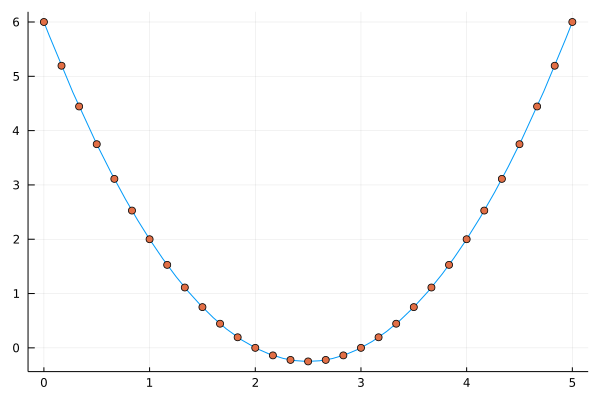

In [35]:
# Teste 1

g(x) = x^2 - 5x + 6
gd(x) = 2x - 5
gdd(x) = 2
x_inicial = 0
y_inicial = 6
x_final = 5
y_final = 6
n = 30

y = Any[y_inicial]
for e in resolver_PVC(gdd, x_inicial, y_inicial, x_final, y_final, n)
    push!(y, e)
end
push!(y, y_final)

plot(g, x_inicial, x_final)

h = (x_final - x_inicial)/(n)
scatter!(x_inicial:h:x_final, y, leg=false)

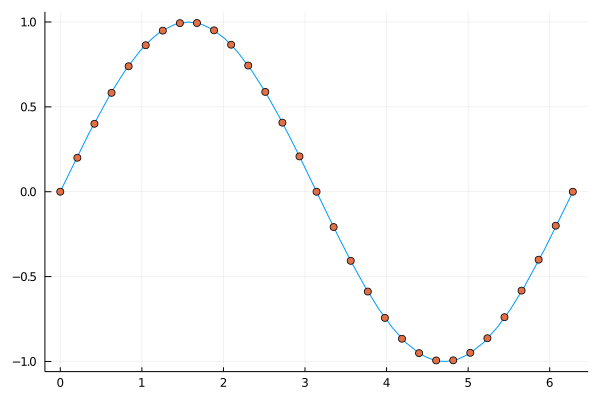

In [36]:
#Teste 2

g(x) = sin(x)
gd(x) = cos(x)
gdd(x) = -sin(x)
x_inicial = 0
y_inicial = 0
x_final = 2*pi
y_final = 0
n = 30

y = Any[y_inicial]
for e in resolver_PVC(gdd, x_inicial, y_inicial, x_final, y_final, n)
    push!(y, e)
end
push!(y, y_final)

plot(g, x_inicial, x_final)

h = (x_final - x_inicial)/(n)
scatter!(x_inicial:h:x_final, y, leg=false)

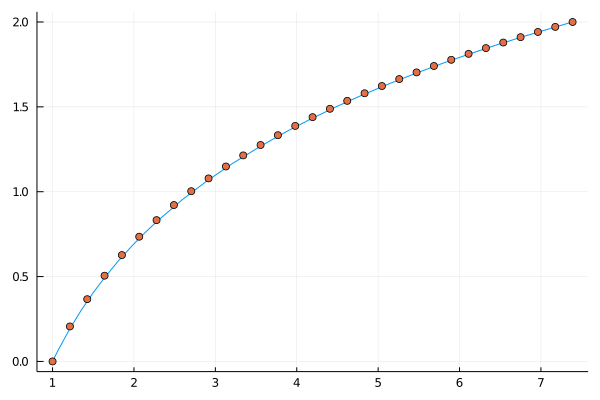

In [37]:
#Teste 3

g(x) = log(x)
gd(x) = 1/x
gdd(x) = -1/x^2
x_inicial = 1
y_inicial = 0
x_final = exp(2)
y_final = 2
n = 30

y = Any[y_inicial]
for e in resolver_PVC(gdd, x_inicial, y_inicial, x_final, y_final, n)
    push!(y, e)
end
push!(y, y_final)

plot(g, x_inicial, x_final)

h = (x_final - x_inicial)/(n)
scatter!(x_inicial:h:x_final, y, leg=false)

### Gerar a Matriz de Vandermonde

In [38]:
""" Essa função recebe uma lista de pontos x e retorna uma matriz cujas colunas são 
dadas por essa lista de pontos elevado a uma potência. A primeira coluna possui apenas 1s, 
a segunda é potência de 1, a terceira de 2, e assim em diante até o grau especificado. """

function matriz_de_vandermonde(pontos_x, grau)
    matriz = ones(length(pontos_x))
    for i in 1:grau
        matriz = hcat(matriz, pontos_x.^i)
    end 
    return matriz
end

matriz_de_vandermonde (generic function with 1 method)

In [39]:
matriz_de_vandermonde([1,2,4,2,-1], 3)

5×4 Matrix{Float64}:
 1.0   1.0   1.0   1.0
 1.0   2.0   4.0   8.0
 1.0   4.0  16.0  64.0
 1.0   2.0   4.0   8.0
 1.0  -1.0   1.0  -1.0

In [40]:
matriz_de_vandermonde([1,-1,2,3,-5], 1)

5×2 Matrix{Float64}:
 1.0   1.0
 1.0  -1.0
 1.0   2.0
 1.0   3.0
 1.0  -5.0

In [41]:
matriz_de_vandermonde([2,3,1,2], 5)

4×6 Matrix{Float64}:
 1.0  2.0  4.0   8.0  16.0   32.0
 1.0  3.0  9.0  27.0  81.0  243.0
 1.0  1.0  1.0   1.0   1.0    1.0
 1.0  2.0  4.0   8.0  16.0   32.0

### Fazer Interpolação de Curva por Vandermonde

In [42]:
""" Nessa função, realizamos o processo de interpolação de curvas utilizando a matriz de 
Vandermonde para o sistema. Consiste em passarmos os pontos de x e y como duas listas 
separadas e o grau do polinômio, e a função retorna os coeficientes
do polinômio, na ordem do grau 0 até o grau especificado."""

function interpolacao_coeficientes(pontos_x, pontos_y, grau)
    V = matriz_de_vandermonde(pontos_x,grau)
    coeficientes = resolver_um_sistema(V,pontos_y)
    return coeficientes
end

interpolacao_coeficientes (generic function with 1 method)

In [43]:
f(x) = 9.5 -8*x + x^2 - 0.1x^3
interpolacao_coeficientes([1,5,6,9], [f(1),f(5),f(6),f(9)], 3)

4×1 Matrix{Float64}:
  9.500000000000004
 -8.000000000000004
  1.0000000000000009
 -0.10000000000000007

In [44]:
f(x) = -3 - 5*x - 3*x^2 + 0.4*x^3 + x^5
interpolacao_coeficientes([-1,0,1.5,1,-2,2], [f(-1),f(0),f(1.5),f(1),f(-2),f(2)], 5)

6×1 Matrix{Float64}:
 -3.0
 -4.999999999999997
 -2.999999999999999
  0.39999999999999714
 -2.220446049250313e-16
  1.0000000000000007

In [45]:
f(x) = 3 + 5*x
interpolacao_coeficientes([0,1,-1,2], [f(0),f(1),f(-1),f(2)], 3)

4×1 Matrix{Float64}:
 3.0
 5.0
 0.0
 0.0

### Obter Polinômio por Lagrange

In [46]:
"""
Polinômio de Lagrange dado um conjunto de pontos e o (grau - 1) do polinômio desejado

@param: - coordenadas x
        - coordenadas y
        - (grau - 1) desejado para o polinômio de lagrange (se grau = 3, teremos P_2(x))

@return: - aproximação para f no ponto x_final
"""

function lagrange(pontos_x, pontos_y, grau)
    
    # Vamos usar a classe Polynomials para criar um polinômio de uma variável e
    # facilitar a nossa vida na hora de fazer as operações nele
    poly = Polynomial(0.0)

    for i in 1 : grau
        # no primeiro instante dizemos que o coeficiente é y_i por conveniência mesmo,
        # temos então que o coeficiente pode ser computado da seguinte forma:
        # coeff_i = prod_{i=1}^grau (x - x_i) / (x_i - x_j)
        
        coeff = Polynomial(pontos_y[i])
        
        for j in 1 : grau
            if i == j
                # caso especial, não consideramos os
                # mesmos índices
                continue
            end

            # adicionamos esse coeficiente no polinômio
            # ele vai ter como numerador o polinômio (x - x_i) e denominador (x_i - x_j)
            coeff = coeff * Polynomial([-pontos_x[j], 1.0]) / (pontos_x[i] - pontos_x[j])
        end

        # adicionamos o coeficiente no polinômio
        # nesse momento o polinômio já tem todos coeficientes até grau i computados
        poly += coeff
        
    end

    # retornamos polinômio na forma [1, x, x^2, ..., x^(grau-1)]
    return poly
end

lagrange (generic function with 1 method)

In [47]:
x = [1.0, 2.0, 7.0]
y = [2.0, 5.0, 9.0]

println(coeffs(lagrange(x, y, 3)))

[-1.733333333333333, 4.1, -0.36666666666666675]


In [48]:
x = [-1.0, 2.0, 3.0, 5.0]
y = [0.0, 1.0, 1.0, 2.0]

println(coeffs(lagrange(x, y, 3)))

[0.5, 0.41666666666666674, -0.08333333333333331]


In [49]:
x = [0.0, 2.0, 4.0]
y = [-2.0, 1.0, 4.0]

println(coeffs(lagrange(x, y, 2)))

[-2.0, 1.5]


### Fazer Interpolação de Curva por Lagrange

In [50]:
""" Essa função faz a interpolação dos pontos x e y dados e retorna uma função com o grau passado.
Vale notar que a função é apenas um encapsulamento da função que gera o lagrange."""

function interpolacao_funcao(pontos_x,pontos_y, grau)
    polinomio =lagrange(pontos_x,pontos_y,grau)
    return polinomio
end

interpolacao_funcao (generic function with 1 method)

In [51]:
x = [1.0, 2.0, 7.0]
y = [2.0, 5.0, 9.0]

interpolacao_funcao(x,y,3)

Polynomial(-1.733333333333333 + 4.1*x - 0.36666666666666675*x^2)

In [52]:
x = [-1.0, 2.0, 3.0, 5.0]
y = [0.0, 1.0, 1.0, 2.0]

interpolacao_funcao(x, y, 3)

Polynomial(0.5 + 0.41666666666666674*x - 0.08333333333333331*x^2)

In [53]:
x = [0.0, 2.0, 4.0]
y = [-2.0, 1.0, 4.0]

interpolacao_funcao(x, y, 2)

Polynomial(-2.0 + 1.5*x)

### Aplicação de um x em uma função

In [54]:
""" Função auxiliar que transforma uma lista de coeficientes num polinômio centrado em x0 que também é dado como entrada.

Ex de entrada: [ c, b, a ]
Saída: ax^2 + bx + c
"""

function aplica(coeficientes, valor_de_x) # Recebe a lista de coeficientes e o valor x0 
    grau_x = 1                             # Começamos com x^0 no polinômio, ou seja, o termo de coeficientes constante
    valor_do_polinomio_no_x = 0            # Polinômio começa com valor igual a 0
    for i = 1:length(coeficientes)         
        valor_do_polinomio_no_x += coeficientes[i] * grau_x # x0^(i-1) * C_i
        grau_x *= valor_de_x # x0^(i-1) = x0^i
    end
    return valor_do_polinomio_no_x # retorna o valor do polinômio em x0
end

aplica (generic function with 1 method)

### Resolver um Sistema por Mínimos Quadrados

In [55]:
""" Resolvemos um sistema por mínimos quadrados aproveitando a função já implementada que resolve sistemas da forma
    Ax = b. Como a fórmula para mínimos quadrados é A'Ax = A'b, passamos como entrada apenas A e b, e para a função aninhada
    resolver um sistema passamos A'A e A'b. Como saída temos o vetor de x solução do sistema. """

function resolver_um_sistema_por_minimos_quadrados(A,b) 
    x=resolver_um_sistema(A'*A,A'*b) # Resolve o Sistema A'Ax = A'b uma vez que sabemos resolver o sistema Ax=b
    return x # Retorna a solução do sistema, ou seja, o vetor x
end

resolver_um_sistema_por_minimos_quadrados (generic function with 1 method)

### Regressão Linear de Funções Lineares

In [ ]:
""" Com coeficientes lineares usamos polinômios para fazer as regressões. Dessa forma, precisamos da matriz de Vandermonde
    que representa o grau dos valores de x. Em suma, teremos uma matriz alta de Vandermonde e o vetor de b que contêm 
    os valores de y dados e retornaremos os coeficientes do polinômio que minimiza a soma dos quadrados das distâncias. """


function regressão_coeficientes_lineares(pontos_x,pontos_y, grau) 
    V=matriz_de_vandermonde(pontos_x,grau)  #Matriz alta de Vandermonde -> muitas linhas e poucas colunas e o grau do polinômio.
    coeficientes= resolver_um_sistema_por_minimos_quadrados(V,pontos_y) # retorna os coeficientes do polinômio por mínimos quadrados.
end

[0.047619047619047616; 0.0]


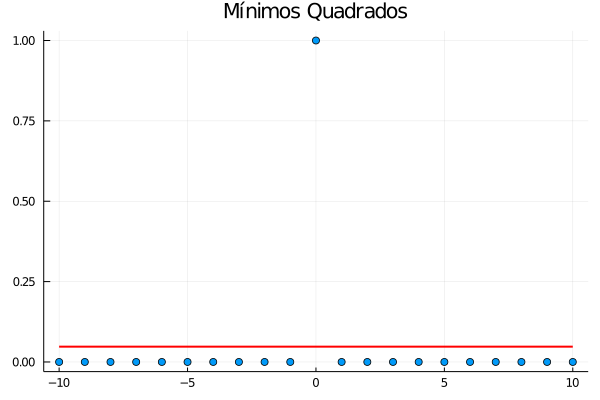

In [57]:
n = 21
x = range(-10, 10, length=n)
y = zeros(n)
y[11] = 1;

a = regressão_coeficientes_lineares(x, y, 1) # recebe os coeficientes com polinômio de grau 1: c0 + c1*x
println(a)  # printa os coeficientes

# Plota os pontos junto com a curva que conseguimos que minimiza a soma dos quadrados das distâncias
scatter(x,y,leg=false)
plot!(x -> a[1] + a[2] * x, extrema(x)..., c=:red, lw=2)
title!("Mínimos Quadrados")

[-1035.347565078044; 54.54998093497836]


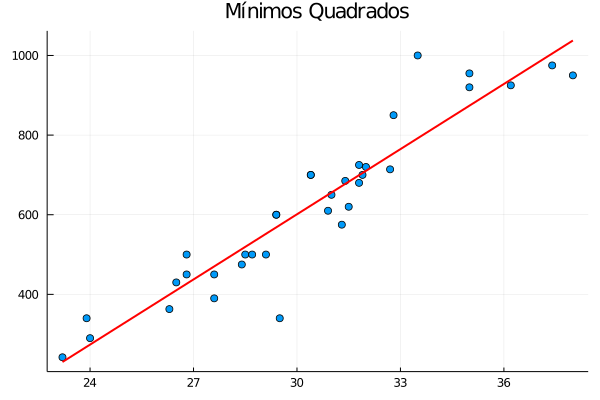

In [58]:
# Dados retirados da relação dos pesos de tipo um peixe com suas alturas
x = [23.2, 24, 23.9, 26.3, 26.5, 26.8, 26.8, 27.6, 27.6, 28.5, 28.4, 28.7, 29.1, 29.5, 29.4, 29.4, 30.4, 30.4, 30.9, 31, 31.3, 31.4, 31.5, 31.8, 31.9, 31.8, 32, 32.7, 32.8, 33.5, 35, 35, 36.2, 37.4, 38]
y = [242, 290, 340, 363, 430, 450, 500, 390, 450, 500, 475, 500, 500, 340, 600, 600, 700, 700, 610, 650, 575, 685, 620, 680, 700, 725, 720, 714, 850, 1000, 920, 955, 925, 975, 950]

a = regressão_coeficientes_lineares(x, y, grau) # recebe os coeficientes
println(a)  # printa os coeficientes

# Plota os pontos junto com a curva que conseguimos que minimiza a soma dos quadrados das distâncias
scatter(x,y,leg=false)
plot!(x -> a[1] + a[2] * x, extrema(x)..., c=:red, lw=2)
title!("Mínimos Quadrados")

[0.0; 1.0]


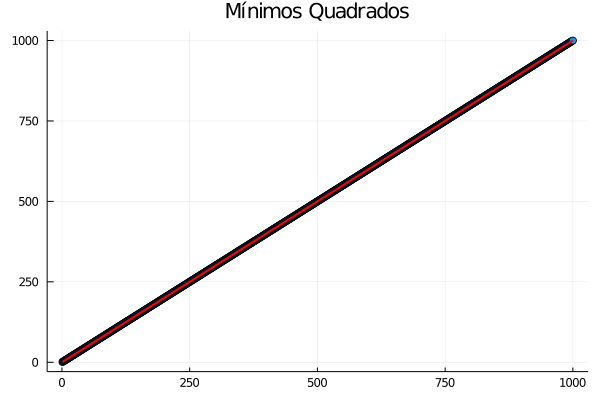

In [59]:
# Testando com uma função especificamente linear
x = []
y = []

for i in 1:1000
    push!(x, i)
    push!(y, i)
    
end

a = regressão_coeficientes_lineares(x, y, grau) # recebe os coeficientes
println(a)  # printa os coeficientes

# Plota os pontos junto com a curva que conseguimos que minimiza a soma dos quadrados das distâncias
scatter(x,y,leg=false)
plot!(x -> a[1] + a[2] * x, extrema(x)..., c=:red, lw=2)
title!("Mínimos Quadrados")

### Regressão Linear de Funções Exponenciais

In [95]:
""" A função regressão_função_exponencial minimiza a soma dos quadrados das distâncias de acordo com a função c0*e^(x*c1).
    Sendo assim, para calcular os coeficientes precisamos usar log natural como um dicionário, que "linenizará" a função.
    Como entrada temos os valores de x, os valores de y correspondentes aos valores de x. E como saida o retorno dos
    coeficientes c0 e c1. """

function regressão_função_exponencial(pontos_x,pontos_y) 
    #dicionário ("linearização") é feito manualmente ou por uma tabela
    pontos_y_barra = zeros(length(pontos_y))
    for i in 1:length(pontos_x)
        pontos_y_barra[i] = log(pontos_y[i]) # aplicamos log nos valores de y e na direita da equação temos c0 + x*c1
    end
    pontos_x_barra = pontos_x # os valores de x se mantém os mesmos
    
    #resolver regresssão com coeficientes lineares no "mundo barra"
    coeficientes_barra = regressão_coeficientes_lineares(pontos_x_barra,pontos_y_barra, 1)
    return coeficientes_barra
end

regressão_função_exponencial (generic function with 2 methods)

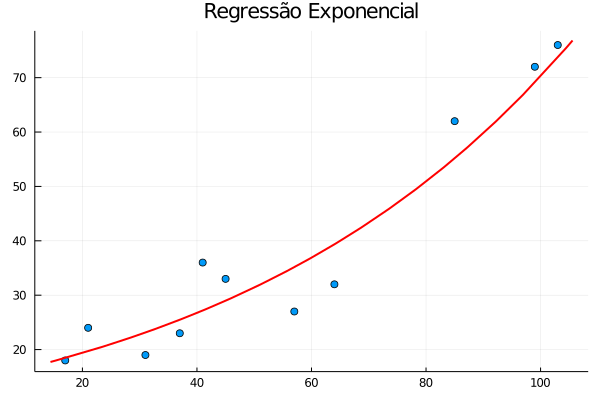

In [100]:
# Data Set aleatório
pontos_x = [45, 99, 31, 57, 37, 85, 21, 64, 17, 41, 103]
pontos_y = [33, 72, 19, 27, 23, 62, 24, 32, 18, 36, 76]

# Recebe os coeficientes com a função exponencial
Coeficientes = regressão_função_exponencial(pontos_x, pontos_y)
polinomio(x) = (ℯ^Coeficientes[1])*ℯ^(x*Coeficientes[2]) # define o polinômio "voltando para o mundo original" aplicando e
# Faz o plot da regressão junto os valores dados
scatter(pontos_x,pontos_y,leg=false)
plot!(pontos_x -> polinomio(pontos_x), c=:red, lw=2)
title!("Regressão Exponencial")

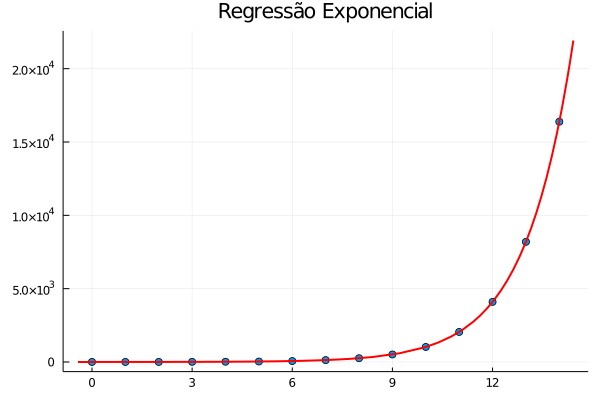

In [101]:
# Caso escolhamos uma função de potencia temos uma interpolação
pontos_x = []
pontos_y = []

for i in 0:14
    push!(pontos_x, i)
    push!(pontos_y, 2^i)
end    

Coeficientes = regressão_função_exponencial(pontos_x, pontos_y)
polinomio(x) = (ℯ^Coeficientes[1])*ℯ^(x*Coeficientes[2])
scatter(pontos_x,pontos_y,leg=false)
plot!(pontos_x -> polinomio(pontos_x), c=:red, lw=2)
title!("Regressão Exponencial")

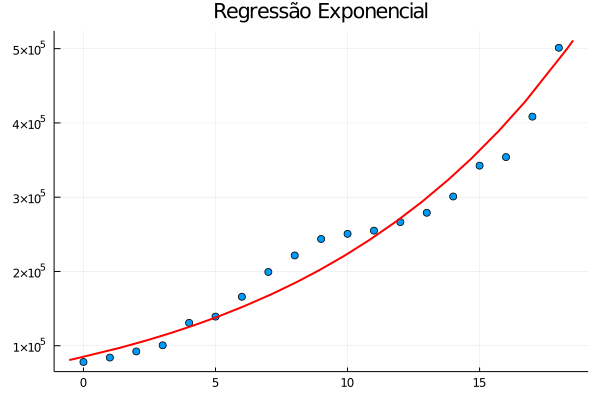

In [102]:
# Data set que representa o número de casos de covid a partir de alguns dias
pontos_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18];
pontos_y = [78134, 84040, 92300, 100567, 130795, 139200, 165919, 199314, 221540, 243737, 250612, 254959, 266444, 278993,
            300915, 342436, 353974, 408428, 501159];

Coeficientes = regressão_função_exponencial(pontos_x, pontos_y)
polinomio(x) = (ℯ^Coeficientes[1])*ℯ^(x*Coeficientes[2])
scatter(pontos_x,pontos_y,leg=false)
plot!(pontos_x -> polinomio(pontos_x), c=:red, lw=2)
title!("Regressão Exponencial")

In [64]:
""" A função regressão_função_potencia_x minimiza a soma dos quadrados das distâncias de acordo com a função c0*x^(c1).
    Sendo assim, para calcular os coeficientes precisamos usar algum log como um dicionário, que "linenizará" a função.
    Escolhi log2 mas talvez possa ser interessante passar o valor do log por parâmetro, por mais que o Julia não tenha
    suporte para valores aleatórios de log.
    Como entrada temos os valores de x, os valores de y correspondentes aos valores de x. E como saida o retorno dos
    coeficientes c0 e c1. """

function regressão_função_potencia_x(pontos_x,pontos_y) #coeficientes não lineares
    #dicionário ("linearização") é feito manualmente ou por uma tabela. É necessário usar o log tanto para os valores
    # de x quanto para os valores de y visto que log(y) = log(c0) + log(x)*c1
    pontos_y_barra = zeros(length(pontos_y))
    pontos_x_barra = zeros(length(pontos_x))
    for i in 1:length(pontos_x)
        pontos_y_barra[i] = log2(pontos_y[i])
        pontos_x_barra[i] = log2(pontos_x[i])
    end


    #resolver regresssão com coeficientes lineares no "mundo barra"
    coeficientes_barra = regressão_coeficientes_lineares(pontos_x_barra,pontos_y_barra, 1)
    return coeficientes_barra
end

regressão_função_potencia_x (generic function with 1 method)

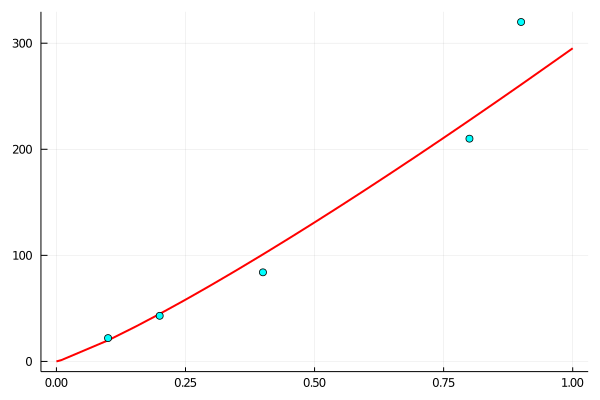

In [103]:
# Dados quaisquer
x = [0.1, 0.2, 0.4, 0.8, 0.9]
y = [22, 43, 84, 210, 320]

# Pega os coeficientes de acordo com a função F(x) = c0*x^c1
A = regressão_função_potencia_x(x, y, 1)
# Voltamos para "o mundo normal" ao elevar
plot(x -> 2^A[1]*(x^A[2]), 0, 1, c=:red, lw=2)
scatter!(x,y, leg=false, c=:cyan)

[14.999286479412921; 0.8189496652466944]


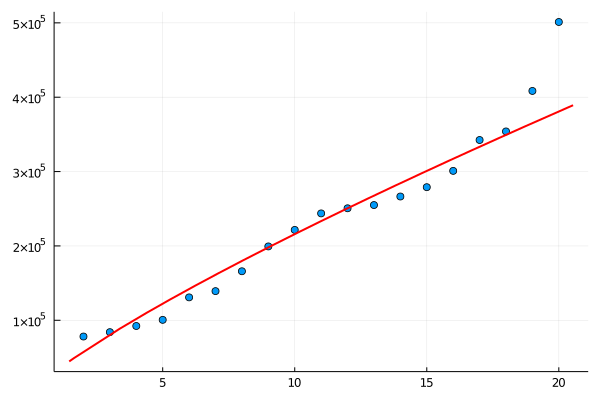

In [106]:
# DataSet casos de covid numa cidade
pontos_x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
pontos_y = [78134, 84040, 92300, 100567, 130795, 139200, 165919, 199314, 221540, 243737, 250612, 254959, 266444, 278993,
            300915, 342436, 353974, 408428, 501159] 

B = regressão_função_potencia_x(pontos_x, pontos_y, 1)
println(B)
# Plota "voltando para o mundo normal" aplicando log2
scatter(pontos_x,pontos_y,leg=false)
plot!(x -> 2^B[1]*(x^B[2]), c=:red, lw=2)

[-4.769458583795828; 2.8408850567540305]


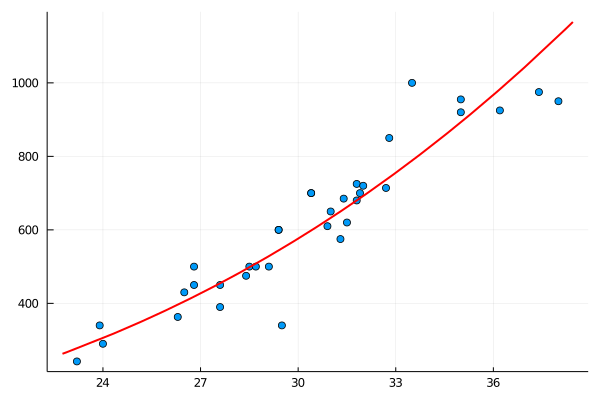

In [105]:
#DataSet dos Peixes
pontos_x = [23.2, 24, 23.9, 26.3, 26.5, 26.8, 26.8, 27.6, 27.6, 28.5, 28.4, 28.7, 29.1, 29.5, 29.4, 29.4, 30.4, 30.4, 30.9, 31, 31.3, 31.4, 31.5, 31.8, 31.9, 31.8, 32, 32.7, 32.8, 33.5, 35, 35, 36.2, 37.4, 38]
pontos_y = [242, 290, 340, 363, 430, 450, 500, 390, 450, 500, 475, 500, 500, 340, 600, 600, 700, 700, 610, 650, 575, 685, 620, 680, 700, 725, 720, 714, 850, 1000, 920, 955, 925, 975, 950]
D = regressão_função_potencia_x(pontos_x, pontos_y, 1)
println(D)
scatter(pontos_x,pontos_y,leg=false)
plot!(x -> 2^D[1]*(x^D[2]), c=:red, lw=2)

### Perguntar

In [68]:
# Perguntar pra ele
function regresso_função_outra_funçao(pontos_x,pontos_y, grau) #coeficientes não lineares
    #dicionário ("linearização") é feito manualmente ou por uma tabela
    ??????????????
    
    #resolver regresssão com coeficientes lineares no "mundo barra"
    regressão_coeficientes_lineares(pontos_x_barra,pontos_y_barra, grau)
    
    #voltar para o mundo original
    ???????????????????????
    
    return coeficientes
end

LoadError: syntax: invalid identifier name "?"

### Integração pela Regra do Retângulo

In [69]:
""" O objetivo dessa função é aproximar a integração da função no intervalo [a,b] utilizando 
o somatório de n retângulos dados pela base sendo o intervalo [x_k,x_k+1] e a altura como a 
média das funções nesses dois pontos. O retorno será a estimativa da integral."""

function regra_do_retangulo(funcao,a,b,n)
    integral = 0.0
    h = (b-a)/n 
    for i in 1:n
        f = (funcao( a+h*i ) + funcao( a+h*(i-1) ))/2
        integral = integral + f*h
    end
    return integral
end

regra_do_retangulo (generic function with 1 method)

In [70]:
f(x) = 2x^2-x
regra_do_retangulo(f,0,5,100)

70.83750000000002

In [71]:
f(x) = log(x)
regra_do_retangulo(f,1,5,100)

4.047082902554811

In [72]:
f(x) = sin(x)
regra_do_retangulo(f,-10,10,100)

-1.0408340855860843e-15

### Integração pela Regra do Trapézio

In [73]:
""" O objetivo dessa função é aproximar a integração da função no intervalo [a,b] utilizando o 
somatório de n trapézios dados pelo intervalo [x_k,x_k+1] e as duas bases como as funções nesses 
dois pontos. O retorno será a estimativa da integral."""

function regra_do_trapezio(funcao,a,b,n)
    soma = f(a)+f(b)
    for i = 1:n-1
        x = a + i*(b-a)/n
        soma = soma + 2*f(x)
    end
    
    return soma * (b-a) / (2*n)
end

regra_do_trapezio (generic function with 1 method)

In [74]:
f(x) = 2x^2-x
regra_do_trapezio(f,0,5,100)

70.8375

In [75]:
f(x) = log(x)
regra_do_trapezio(f,1,5,100)

4.047082902554812

In [76]:
f(x) = sin(x)
regra_do_trapezio(f,-10,10,100)

1.7763568394002506e-16

### Integração pela Regra do Simpson

In [77]:
""" O objetivo dessa função é aproximar a integração da função no intervalo [a,b] dividindo-o
em n (sendo n necessariamente par) subintervalos e utilizando a regra de simpson em cada um deles.
A regra de simpson em cada um desses subintervalos consiste em aproximar o valor da integral nesse
subintervalo pegando 3 pontos (as duas extremidades do subintervalo e um médio), e logo em seguida
aproximando a curva que os descreve usando um polinômio interpolador de grau dois.

A função retorna uma aproximação para a interval definida dada pelo input

ERRO: Essa aproximação tem erro inferior a f^4(x) * 1/180 * (b - a)[(b - a)/n]^4, sendo
f^4(x) o valor máximo da quarta derivada de f(x) no intervalo [a, b]

@param: - f, função f(x) que queremos integrar
        - a, primeiro ponto do intervalo
        - b, último ponto do intervalo
        - n denota a metade da quantidade de subintervalos que pretendemos dividir nosso intervalo

@return: - aproximação para integral de f no intervalo [a,b] dividido em 2n partes
"""

# regra de simpson composta
function regra_de_simpson(f, a, b, n)
    @assert(n % 2 == 0, "você precisa escolher um n par!")
    
    # h denota o tamanho do subintervalo
    h = (b - a) / n / 2.0

    # adicionamos de antemão a contribuição dos
    # pontos nas extremidades
    S = f(a) + f(b)

    # vamos somar agora a imagem dos pontos médios
    for i in 1 : (n << 1)-1
        if (i & 1 == 1)
            # termo ímpar tem peso 4
            S += f(a + h * i) * 4
        else 
            # termo par tem peso 2
            S += f(a + h * i) * 2
        end
    end

    return S / 3.0 * h
end

regra_de_simpson (generic function with 1 method)

In [78]:
function f(x)
    return x*x - 16*x - exp(x)
end

println(regra_de_simpson(f, 1.0, 4.0, 48))

-150.87986847952268


In [79]:
function f(x) 
    return exp(-x^2)
end

# nesse caso temos uma integral sem uma primitiva analítica
println(regra_de_simpson(f, 0.0, 2.0, 2112));

0.8820813907624211


In [80]:
function f(x) 
    return cos(x)
end

println(regra_de_simpson(f, 0.0, acos(-1.0)/2.0, 5322))

1.0000000000000049


### Obter o Máximo de uma Função

In [81]:
# A estratégia é parecida com a dos pontos críticos, com exceção que checamos todos eles
# Também checamos as laterais para saber se as laterais são os maiores valores
# E por fim precisamos do denominador da função (caso haja) para verificar por assíntotas verticais
function maximar_uma_funcao(funcao, derivada, segunda_derivada, esq, dir, denominador=0, qtd_iterações=1e2, erro=1e-8)
    
    # Inicializamos o maximo global
    maximo_global = []
    
    # Se o denominador não for o padrão
    if denominador != 0
        
        # Verificamos a bisseção para achar o 0
        b = bissecao(denominador, esq, dir)
        
        # Se o retorno não for um erro (por não existir raízes no denominador)
        # Retornamos o ponto da assíntota vertical
        if typeof(b) != String && funcao(b) == Inf
            return b
        end
    end
    
    # Começamos uma lista de intervalos para o método da bisseção e selecionaremos os propícios
    lista_de_intervalos = Any[[esq, dir]]
    intervalos_propicios = Any[]
    
    # Escolhemos uma quantidade de iterações para diminuir o intervalo
    for j in 1:qtd_iterações
        
        # Se a lista de intervalos estiver vazia, não temos mais o que procurar
        if size(lista_de_intervalos, 1) == 0
            break
        end
        
        # Pega o primeiro intervalo da lista
        intervalo = lista_de_intervalos[1]
        
        # Pega os pontos desse intervalo
        a = intervalo[1]
        b = intervalo[2]
        
        # Calcula o ponto médio do intervalo
        metade_do_intervalo = (a+b)/2.0
        
        # Retira o intervalo da lista
        deleteat!(lista_de_intervalos, 1)

        # Sendo x a metade do intervalo, se um dos intervalos criados [a, x] ou [x, b] satisfizer as condições
        # Adicionamos ele a uma outra lista contendo os intervalos bons
        # Caso contrário adicionamos eles a nossa lista de intervalos
        if derivada(a)*derivada(metade_do_intervalo) <= 0
            push!(intervalos_propicios, [a, metade_do_intervalo])
        else
            push!(lista_de_intervalos, [a, metade_do_intervalo])
        end
        
        if derivada(metade_do_intervalo)*derivada(b) <= 0
            push!(intervalos_propicios, [metade_do_intervalo, b])
        else
            push!(lista_de_intervalos, [metade_do_intervalo, b])
        end
        
    end
    
    maximos_locais = []
    
    # Checamos todos os intervalos
    for i in 1:size(intervalos_propicios, 1)
        
        # Utilizando a bissecao para achar o ponto
        x = bissecao(derivada, intervalos_propicios[i][1], intervalos_propicios[i][2], erro)
    
        # Se for maximo local, colocamos na lista para verificar se é máximo global
        if segunda_derivada(x) <= 0
            push!(maximos_locais, x)
        end
    end
    
    # Achamos o maximo global
    if size(maximos_locais, 1) > 0
        
        # Verificamos cada um dos maximos locais
        for x in maximos_locais
            if (size(maximo_global, 1) > 0)
                if (maximo_global[1][2] < funcao(x))
                    deleteat!(maximo_global, 1)
                    push!(maximo_global, [x, funcao(x)])
                end
            else
                push!(maximo_global, [x, funcao(x)])
            end
        end
        
    end
    
    # E verificamos as laterais
    if (size(maximo_global, 1) > 0)
        if maximo_global[1][2] < funcao(esq)
            deleteat!(maximo_global, 1)
            push!(maximo_global, [esq, funcao(esq)])
        end
    else
        push!(maximo_global, [esq, funcao(esq)])
    end
    if maximo_global[1][2] < funcao(dir)
        push!(maximo_global, [dir, funcao(dir)])
    end
        
    return maximo_global[1][1]
end

maximar_uma_funcao (generic function with 4 methods)

In [82]:
# Teste 1

f(x) = 1/x
fd(x) = -1/x^2
fdd(x) = 2/x^3
esq = -1
dir = 1
d(x) = x
p = maximar_uma_funcao(f, fd, fdd, esq, dir, d)
f(p)

Inf

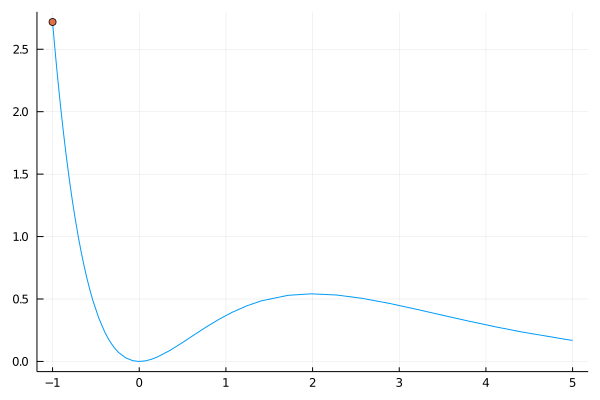

In [83]:
# Teste 2

f(x) = x^2 * exp(-x)
fd(x) = -exp(-x)*x*(x-2)
fdd(x) = exp(-x)*(x^2 - 4*x + 2)
esq = -1
dir = 5
p = maximar_uma_funcao(f, fd, fdd, esq, dir)

plot(f, esq, dir, leg=false)
scatter!(p:p, [f(p)])

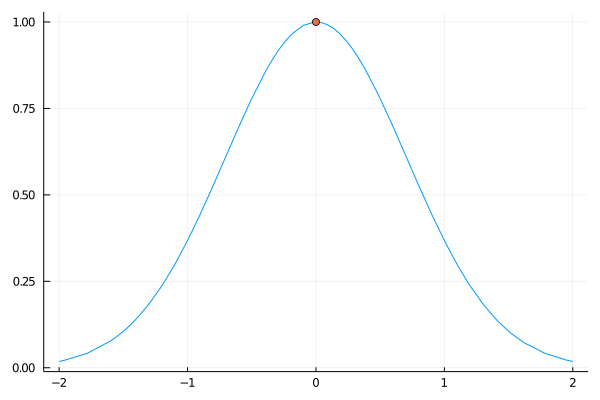

In [84]:
# Teste 3

f(x) = exp(-x^2)
fd(x) = -2*exp(-x^2)*x
fdd(x) = exp(-x^2)*(4*x^2 - 2)
esq = -2
dir = 2
p = maximar_uma_funcao(f, fd, fdd, esq, dir)

plot(f, esq, dir, leg=false)
scatter!(p:p, [f(p)])

### Encontrar um ponto crítico de uma função

In [85]:
""" A ideia aqui é acharmos o ponto em que f'(x) = 0. Podemos usar bisseção, newton ou ponto fixo para isso. """

function achar_um_ponto_critico_de_uma_funcao(derivada, esq, dir, erro = 1e-2, qtd_iterações = 10)
    
    # Começamos uma lista de intervalos para o método da bisseção e selecionaremos os propícios
    lista_de_intervalos = Any[[esq, dir]]
    intervalos_propicios = Any[]
    
    # Escolhemos uma quantidade de iterações para diminuir o intervalo
    for j in 1:qtd_iterações
        
        # Se a lista de intervalos estiver vazia, não temos mais o que procurar
        if size(lista_de_intervalos, 1) == 0
            break
        end
        
        # Pega o primeiro intervalo da lista
        intervalo = lista_de_intervalos[1]
        
        # Pega os pontos desse intervalo
        a = intervalo[1]
        b = intervalo[2]
        
        # Calcula o ponto médio do intervalo
        metade_do_intervalo = (a+b)/2.0
        
        # Retira o intervalo da lista
        deleteat!(lista_de_intervalos, 1)

        # Sendo x a metade do intervalo, se um dos intervalos criados [a, x] ou [x, b] satisfizer as condições
        # Adicionamos ele a uma outra lista contendo os intervalos bons
        # Caso contrário adicionamos eles a nossa lista de intervalos
        if derivada(a)*derivada(metade_do_intervalo) <= 0
            push!(intervalos_propicios, [a, metade_do_intervalo])
        else
            push!(lista_de_intervalos, [a, metade_do_intervalo])
        end
        
        if derivada(metade_do_intervalo)*derivada(b) <= 0
            push!(intervalos_propicios, [metade_do_intervalo, b])
        else
            push!(lista_de_intervalos, [metade_do_intervalo, b])
        end
        
    end
    
    println(intervalos_propicios)
    
    # Pega o primeiro ponto crítico da lista
    ponto_crítico = bissecao(derivada, intervalos_propicios[1][1], intervalos_propicios[1][2], erro)
        
    return ponto_crítico
end

achar_um_ponto_critico_de_uma_funcao (generic function with 3 methods)

Any[[0.0, 2.5], [2.5, 5.0]]


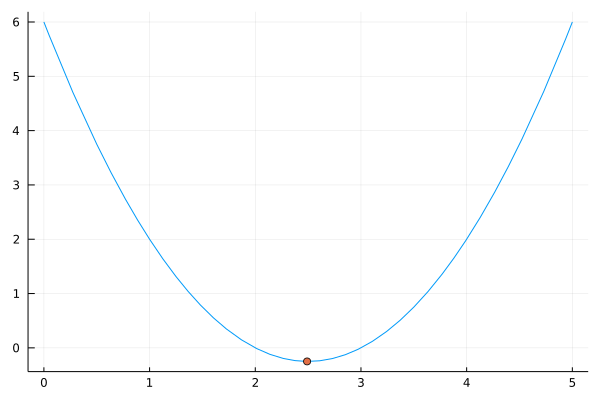

In [86]:
#Teste 1

f(x) = x^2 - 5x + 6
fd(x) = 2x - 5
p = achar_um_ponto_critico_de_uma_funcao(fd, 0, 5)

plot(f, 0, 5)
scatter!(p:p, [f(p)], leg=false)

Any[[0.0, 2.5], [2.5, 5.0]]


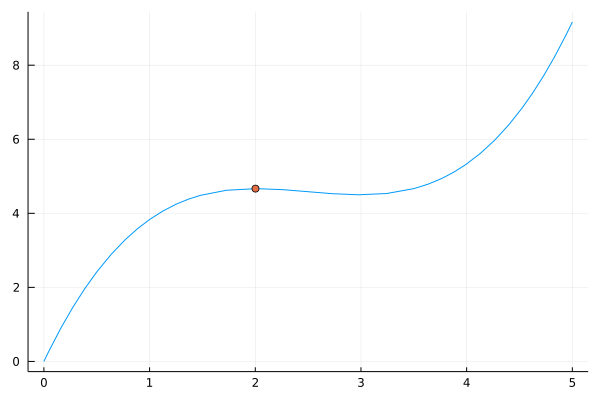

In [87]:
#Teste 2

f(x) = x^3/3 - 5x^2/2 + 6x
fd(x) = x^2 - 5x + 6
p = achar_um_ponto_critico_de_uma_funcao(fd, 0, 5)

plot(f, 0, 5)
scatter!(p:p, [f(p)], leg=false)

Any[[1.5707963267948966, 3.141592653589793]]


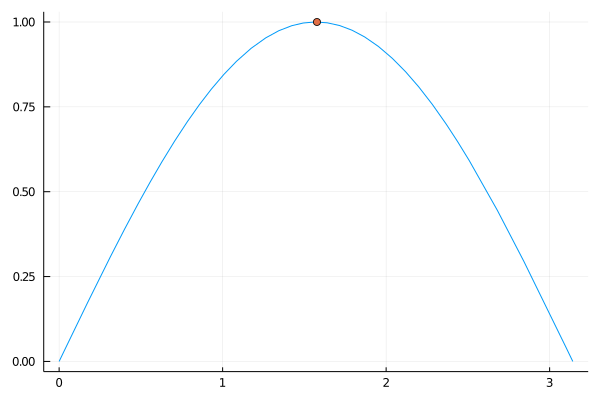

In [88]:
# Teste 3

f(x) = sin(x)
fd(x) = cos(x)
p = achar_um_ponto_critico_de_uma_funcao(fd, 0, pi)
plot(f, 0, pi)
scatter!(p:p, [f(p)], leg=false)

### Encontrar um ponto crítico de uma função de 2 variáveis

In [89]:
""" Nessa função, queremos encontrar um ponto crítico em uma função de duas variáveis. Para isso, utilizamos o 
método do gradiente descendente, em que descemos a curva da função através do decremento do gradiente, visto que
este aponta para a direção de maior crescimento. Para isso, é necessário passar o gradiente da função no formato 
[fdx, fdy], os intervalos de x e y no formato [a, b] e a quantidade de iterações a ser realizada pelo método. """

function achar_um_ponto_critico_de_uma_funcao_de_2_variaveis(gradiente_da_funcao, intervalox, intervaloy, iteracoes)
    # Iniciamos aleatoriamente o ponto
    px = rand(intervalox[1]:intervalox[2])
    py = rand(intervaloy[1]:intervaloy[2])
    taxa = 0.1
    
    for i in 1:iteracoes
        # Obtemos o gradiente no ponto
        grad = gradiente_da_funcao(px,py)
        
        # Checamos se esta dentro do intervalo pedido para descer o gradiente
        if (intervalox[1]<=px-grad[1]*taxa<=intervalox[2]) && (intervaloy[1]<=py-grad[2]*taxa<=intervaloy[2])
            px = px - grad[1]*taxa
            py = py - grad[2]*taxa
        else
            break       # Senão acabamos a iteracao
        end 
    end
    
    return [px,py]
end

achar_um_ponto_critico_de_uma_funcao_de_2_variaveis (generic function with 1 method)

In [90]:
# Testando a função x^2+2y^2-3x

d(x,y) = [2x-3, 4y]
achar_um_ponto_critico_de_uma_funcao_de_2_variaveis(d, [-10,10], [-10,10], 500)

2-element Vector{Float64}:
 1.4999999999999996
 2.3804287532992367e-111

In [91]:
# A função x^4 + x*y^3 - 2x^2*y + x - 5yx tem mínimo local em (-0.769, -1.074)

d(x,y) = [4x^3+y^3-4y*x+1-5y,-2x^2+3x*y^2-5x]
achar_um_ponto_critico_de_uma_funcao_de_2_variaveis(d, [-5,5], [-5,5], 500)

2-element Vector{Int64}:
 -2
 -5

In [92]:
# Função sen(x)*cos(y/5) possui muitos pontos locais de minimo e maximo

d(x,y) = [cos(y/5)*cos(x), -1/5*sin(x)*sin(y/5)]
achar_um_ponto_critico_de_uma_funcao_de_2_variaveis(d, [-5,5], [-5,5], 500)

2-element Vector{Float64}:
 -1.5707963267948977
  0.13854110160358418

### Obter Lagrange em 2D

In [93]:
function langrage_2D()
    
end

langrage_2D (generic function with 1 method)